# Training a Linear Classifier

In [91]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [35]:
X, y = load_iris().data[:100,0:2], load_iris().target[:100]

In [92]:
X = StandardScaler().fit_transform(X)

In [93]:
svc = LinearSVC(C=1)

In [94]:
ftsvc = svc.fit(X,y)

In [95]:
ftsvc.predict(X[0].reshape(1,2))

array([0])

In [96]:
ftsvc.intercept_[0]

0.25980442766146994

In [97]:
w = ftsvc.coef_[0]
w[1]

-1.2408850590230578

In [101]:
xx = np.linspace(-2.5,2.5)
yy = (w[0]*xx +(ftsvc.intercept_[0]))/ -w[1]

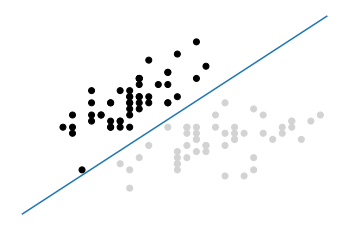

In [102]:
color = ["black" if c == 0 else "lightgrey" for c in y]
plt.scatter(X[:,0], X[:,1], c=color)
plt.plot(xx,yy)
plt.axis('off');

In [112]:
Xmulti, ymulti = load_iris().data, load_iris().target

In [113]:
svclinear = LinearSVC(C=1, multi_class='crammer_singer')

In [115]:
fittedsvc= svclinear.fit(Xmulti,ymulti)

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [118]:
fittedsvc.predict(Xmulti[140].reshape(1,4))

array([2])

# Handling Linearly Inseparable Classes Using Kernels

In [120]:
from sklearn.datasets import make_blobs

In [210]:
def plot_svc_decision_function(model, ax=None,plot_support=None):
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        x = np.linspace(xlim[0], xlim[1], 30)
        y = np.linspace(ylim[0], ylim[1], 30)
    
    X1, Y1 = np.meshgrid(x, y)
    xy = np.vstack([X1.ravel(), Y1.ravel()]).T
    P = model.decision_function(xy).reshape(X1.shape)
    
    ax.contour(X1,Y1, P, colors='k',levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, facecolor='none', linewidth=1, edgecolor='red')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

In [211]:
X, y = make_blobs(n_samples=300, centers=2,random_state=0, cluster_std=0.60)

In [212]:
model = SVC(kernel='linear', C=1000E2)

In [213]:
model = model.fit(X,y)

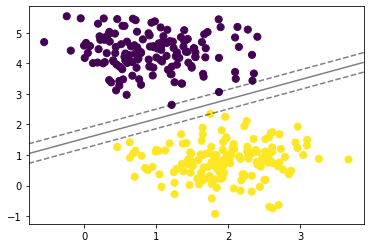

In [214]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plot_svc_decision_function(model)

In [215]:
model.support_vectors_

array([[1.21569789, 2.64023167],
       [1.87296081, 3.06179631],
       [1.7535775 , 2.34513587]])

In [216]:
model.support_

array([  5, 123, 210], dtype=int32)

In [217]:
model.n_support_

array([2, 1], dtype=int32)

In [218]:
from sklearn.datasets import make_circles

In [219]:
Xc, yc = make_circles(1000, noise=.1, factor=.1)

In [220]:
model1 = SVC(kernel ='linear', C=10E2)
model1.fit(Xc,yc)

SVC(C=1000.0, kernel='linear')

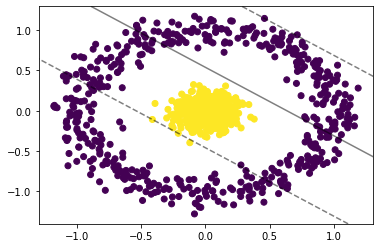

In [221]:
plt.scatter(Xc[:,0], Xc[:,1], c=yc)
plot_svc_decision_function(model1, plot_support=None);

In [173]:
z  = np.exp(-(Xc ** 2).sum(1))

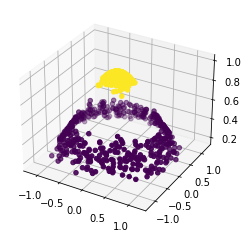

In [174]:
ax = plt.axes(projection='3d')
ax.scatter(Xc[:,0], Xc[:,1], z, c=yc);

In [222]:
modelbetter = SVC(kernel='rbf', C=10E2, gamma=0.5)

In [223]:
ft = modelbetter.fit(Xc,yc)

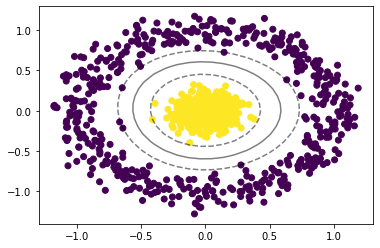

In [226]:
plt.scatter(Xc[:,0], Xc[:,1], c=yc)
plot_svc_decision_function(ft)

In [228]:
ft.support_vectors_

array([[ 0.27677967, -0.67212819],
       [-0.64123158, -0.21597469],
       [-0.64613706,  0.28436667],
       [ 0.1456146 ,  0.72300638],
       [-0.41190687, -0.10887311]])

In [232]:
ft.n_support_

array([4, 1], dtype=int32)

In [273]:
ft.decision_function_shape

'ovr'

# Creating Predicted Probabilities and Identifying Support Vectors

In [253]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

In [254]:
Xi, yi = load_iris().data, load_iris().target

In [264]:
Xi.shape

(150, 4)

In [257]:
model= SVC(kernel='linear',C=10E2 ,probability=True)

In [246]:
linearsvc = LinearSVC(C=1, multi_class='ovr')

In [272]:
linearsvc.multi_class

'ovr'

In [259]:
ftmodel = model.fit(Xi,yi)

In [263]:
ftmodel.coef_.shape

(3, 4)

In [269]:
ftmodel.intercept_

array([ 1.4528445 ,  1.50771313, 25.72649276])

In [265]:
ftmodel.predict_proba(Xi[0].reshape(1,4))

array([[0.97594968, 0.01536467, 0.00868565]])

In [266]:
ftmodel.support_vectors_

array([[5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.7, 5.1, 1.6],
       [5.1, 2.5, 3. , 1.1],
       [4.9, 2.5, 4.5, 1.7],
       [6.1, 3. , 4.9, 1.8],
       [7.2, 3. , 5.8, 1.6],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 3. , 4.8, 1.8]])

In [267]:
ftmodel.support_

array([ 23,  24,  41,  70,  72,  77,  83,  98, 106, 127, 129, 133, 138],
      dtype=int32)

In [268]:
ftmodel.n_support_

array([3, 5, 5], dtype=int32)

In [270]:
ftmodel.decision_function_shape

'ovr'

# Handling Imbalanced Classes

In [281]:
Ximbal ,yimbal = load_iris().data[40:,:], load_iris().target[40:]

In [282]:
yimbal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [283]:
yi_new = np.where((yimbal==0), 0, 1)

In [284]:
yi_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [287]:
modelgood = SVC(kernel='linear', C=10E2, probability=True, class_weight='balanced')

In [289]:
ftgood = modelgood.fit(Ximbal, yi_new)

In [291]:
ftgood.predict_proba(Ximbal[0].reshape(1,4))

array([[0.92533883, 0.07466117]])

In [293]:
ftgood.support_vectors_

array([[4.5, 2.3, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5.1, 2.5, 3. , 1.1]])

In [295]:
ftgood.n_support_

array([2, 1], dtype=int32)

In [296]:
ftgood.support_

array([ 1,  4, 58], dtype=int32)